# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exam 2</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Demonstrate ability to apply groundwater hydrology principles to aquifers

### Additional Instructions

1. The test is intended to be completed by extracting the problem statements and inserting worked answers, including computations into a document, saving that document as a PDF file, and uploading the completed exam to Blackboard.  
2. Show your work; handwritten is OK, but must be neat, organized, and legible (no brain vomit)
3. Cite reference sources used to support your work

**CE 4363** Complete problems 1-4<br>
**CE 5363** Complete problems 1-6<br>
**Problem 7 is extra credit for either course**<br>

<hr>
<hr>

## Question 1 (10 pts.)

Distinguish between the capabilities of ModelMUSE and MODFLOW.

<hr>
<hr>

## Question 2 (30 pts.)

A confined aquifer system is conceptualized as pictured below.

![](aquiferSystem.png)

Water enters the system in the recharge area and exits as a spring.

Determine:
1. The piezometric head in the well located at $M$ (express the head in terms of the other variables indicated on the sketch)
2. Specify the conditions for the well to become a flowing (artesian) well (water flows from the well without pumping).

<hr>
<hr>

![](EX2-P200001.png)

![](EX2-P200002.png)

![](EX2-P200003.png)

## Question 3 (30 pts.)

A 4-cell aquifer model is conceptualized in the figure below.

![](aquiferSystem1D.png)

The width of the aquifer strip is 3.0 km; the length of each cell is 5 km.  The recharge rates for the aquifer strip is $400~\frac{mm}{yr}$, $300~\frac{mm}{yr}$,$300~\frac{mm}{yr}$, $200~\frac{mm}{yr}$ in Cells 1,2,3, and 4, respectively.  The water level in the river is maintained at a constant elevation of $160~m$ above the horizontal impervious bottom.  The hydraulic conductivity in Cells 1 and 2 is $3~\frac{m}{d}$, while in Cells 3 and 4 it is $6~\frac{m}{d}$.

Using this conceptual model, determine:

1. Write the steady-flow balance equations to estimate average water levels in the four cells.
2. Solve these equations to determine the average elevations in the 4 cells without pumping.
3. Solve these equations when pumping takes place in Cells 2 and 3 at rates of $4\times10^{6}~\frac{m^3}{yr}$ and $7\times10^{6}~\frac{m^3}{yr}$, respectively.

### Reference(s)

1. [Bear (1979). *Hydraulics of Groundwater* McGraw-Hill (Chapter 10: Modeling of Aquifer Systems)](ce-4363-webroot/3-Readings/BearChapter10.pdf) (Eq. 10-9) is useful.

<hr>
<hr>

![](strip1.png)

**1. Write the steady-flow balance equations to estimate average water levels in the four cells.**

![](strip2.png)

![](strip3.png)

![](strip4.png)

**2. Solve these equations to determine the average elevations in the 4 cells without pumping.**

![](strip5.png)

In [151]:
# No pumping

# STEP 1
KR=30*365 # RIVER CELL
K1=3*365
K2=3*365
K3=6*365
K4=6*365
#
W=3000
L=5000
#
R1=0.4 
R2=0.3
R3=0.3
R4=0.2
h=[160,160,160,160,160] # initial guess of heads
hold = h[:]
#
KB1=(K1+KR)*0.5
KB2=(K2+K1)*0.5
KB3=(K3+K2)*0.5
KB4=(K4+K3)*0.5
# INITIAL TRANSMISSIVITY
TB1=KB1*(h[1]+h[0])*0.5*W/L
TB2=KB2*(h[2]+h[1])*0.5*W/L
TB3=KB3*(h[3]+h[2])*0.5*W/L
TB4=KB4*(h[4]+h[3])*0.5*W/L

for updates in range(100): # do a bunch of updates
    h = hold[:]
    for iter in range(100): # do a bunch of iterations per update
        h[1]=(TB2*h[2]+TB1*h[0]+R1*W*L)/(TB2+TB1)
        h[2]=(TB3*h[3]+TB2*h[1]+R2*W*L)/(TB3+TB2)
        h[3]=(TB4*h[4]+TB3*h[2]+R3*W*L)/(TB4+TB3)
        h[4]=(         TB4*h[3]+R4*W*L)/(TB4    )
    hold = h[:]
# update the transmissivity array
    TB1=KB1*(hold[1]+hold[0])*0.5*W/L
    TB2=KB2*(hold[2]+hold[1])*0.5*W/L
    TB3=KB3*(hold[3]+hold[2])*0.5*W/L
    TB4=KB4*(hold[4]+hold[3])*0.5*W/L
print(hold)

# check results
cell1 = TB2*(h[2]-h[1])-TB1*(h[1]-h[0])+R1*W*L
cell2 = TB3*(h[3]-h[2])-TB2*(h[2]-h[1])+R2*W*L
cell3 = TB4*(h[4]-h[3])-TB3*(h[3]-h[2])+R3*W*L
cell4 =                -TB4*(h[4]-h[3])+R4*W*L
bal = [cell1,cell2,cell3,cell4]
print(bal)

[160, 188.58059311505625, 268.5001312195642, 295.4877672884788, 303.1158700279355]
[0.0, 1.862645149230957e-09, 0.0, 1.3969838619232178e-09]


In [152]:
# with pumping

# STEP 1
KR=30*365 # RIVER CELL
K1=3*365
K2=3*365
K3=6*365
K4=6*365
#
W=3000
L=5000
#
R1=0.4 
R2=0.3
R3=0.3
R4=0.2
h=[160,160,160,160,160] # initial guess of heads
hold = h[:]
#
KB1=(K1+KR)*0.5
KB2=(K2+K1)*0.5
KB3=(K3+K2)*0.5
KB4=(K4+K3)*0.5
# INITIAL TRANSMISSIVITY
TB1=KB1*(h[1]+h[0])*0.5*W/L
TB2=KB2*(h[2]+h[1])*0.5*W/L
TB3=KB3*(h[3]+h[2])*0.5*W/L
TB4=KB4*(h[4]+h[3])*0.5*W/L
# pumping
P1=0
P2=4e6
P3=7e6
P4=0

for updates in range(100): # do a bunch of updates
    h = hold[:]
    for iter in range(100): # do a bunch of iterations per update
        h[1]=(TB2*h[2]+TB1*h[0]+R1*W*L-P1)/(TB2+TB1)
        h[2]=(TB3*h[3]+TB2*h[1]+R2*W*L-P2)/(TB3+TB2)
        h[3]=(TB4*h[4]+TB3*h[2]+R3*W*L-P3)/(TB4+TB3)
        h[4]=(         TB4*h[3]+R4*W*L-P4)/(TB4    )
    hold = h[:]
# update the transmissivity array
    TB1=KB1*(hold[1]+hold[0])*0.5*W/L
    TB2=KB2*(hold[2]+hold[1])*0.5*W/L
    TB3=KB3*(hold[3]+hold[2])*0.5*W/L
    TB4=KB4*(hold[4]+hold[3])*0.5*W/L
print(hold)

# check results
cell1 = TB2*(h[2]-h[1])-TB1*(h[1]-h[0])+R1*W*L-P1
cell2 = TB3*(h[3]-h[2])-TB2*(h[2]-h[1])+R2*W*L-P2
cell3 = TB4*(h[4]-h[3])-TB3*(h[3]-h[2])+R3*W*L-P3
cell4 =                -TB4*(h[4]-h[3])+R4*W*L-P4
bal = [cell1,cell2,cell3,cell4]
print(bal)

[160, 171.68098333462447, 180.3288664334832, 183.1207618285417, 195.19073609761196]
[-3.725290298461914e-09, -3.259629011154175e-09, -1.862645149230957e-09, -4.656612873077393e-10]


<hr>
    
## Question 4 (30 pts.)

The figure is a plan view of a confined aquifer showing two contaminated zones, 1 and 2. The aquifer has a saturated thickness of 80 ft, hydraulic conductivity of 42 ft/d, and the regional hydraulic gradient is 0.0075 from right to left as shown. A pumping well with a flow rate of 170 gpm is planned to run continuously at the location shown, and form a stable (equilibrium) capture zone. You may assume that the 2500 ft distance from the well to zone 1 is long enough that the capture zone has reached its maximum width.

![](plumeria.png)

Determine:

1. If contamination from zone 1 find its way to the pumping well? Provide support for your answer with a capture zone analysis or contaminant simulation model.
2. If contamination from zone 2 find its way to the pumping well? Provide support for your answer with a capture zone analysis or contaminant simulation model.

### References

1. [Javandel,I., and Tsang,C-F. (1986) "Capture Zone Type Curves: A Tool for Aquifer Cleanup" *Groundwater* Vol. 24 No. 5 pp. 616-625](http://54.243.252.9/ce-4363-webroot/3-Readings/Capture.PDF)

<hr>
<hr>

Convert to SI units for Type Curve use:

Q = 170 gpm * (1/7.48) * (1/3.28)^3 * 1440 = 927 m^3/day
B = 80ft * (1/3.28) = 24 meters
U = 42 ft/d * (1/3.28) = 12.08 m/day * 0.0075 = 0.0906

Q/BU for this porblem is 927/(24 * 0.09) = 847

Now plot 

![](typecurve.png)

So Zone 1 the elongated rectangle to right side will be captured.

Zone 2 to the left of the well will not.

Obviously, with dimensioned drawings can make point a little better.

<hr>
<hr>

## CE 5363 Question 5 (30 pts.)

A saturated aquifer sample core of diameter 2.54 cm and length of 6 cm weighs 63 grams.  After drying the sample weighs 53 grams.  The core sample was placed into an permeameter and exposed to a unit hydraulic gradient.  The measured flowrate was 25.4 milliliters/second.

The water levels in three wells in the same aquifer were measured in meters above MSL.  The levels were: Well MW-1: 83.1 m; Well MW-2: 84.6 m; Well MW-3: 83.9 m.  

Well MW-2 is located 1km due north of Well MW-1, and Well MW-3 is located 700 meters Northeast of Well MW-1.

Determine:
1. Estimate the porosity of the aquifer.
2. Estimate the hydraulic conductivity of the aquifer.
3. Sketch the relative positions of the three wells.  Use MW-1 as the origin of the local (your sketch) coordinate system, and North is to the top of your sketch.
4. Determine the magniture and direction of the hydraulic gradient in the aquifer monitored by the three wells.  Indicate the hydraulic gradient on your sketch (direction and magnitude)
5. Estimate the concentration of a conservative constituient (contaminant) at a receptor 4 km away from MW-1 on a flowline that passes through MW-1 using the Ogata-Banks  model, assuming MW-1 is at the source location, and the source concentration is 1000 mg/l. Use one-tenth of the path length as the aquifer dispersivity (recall dispersion coefficient is the product of dispersivity and average linear velocity).  Calculate the receptor concentration from 0 days after release to 1000 days after release in 10 day increments, and make a concentration history plot for the receptor location.
6. An estimate of the time from release until the concentration at the receptor is 500 mg/L.

### References

1. [Ogata, A., & Banks, R. B. (1961). A solution of the differential equation of longitudinal dispersion in porous media: fluid movement in earth materials. US Government Printing Office. (link is to an on-line calculator)](https://www.groundwatersoftware.com/calculator_5_ogata_banks.htm)

2. Fetter Eq. 10-8 p. 412 

<hr>
<hr>

**1**

Voids = 10 cc. (10 g water)

Volume Bulk = 0.25 * pi * 2.54^2 * 6 = 30.4 cm^3

n = Voids/Bulk = 10/30.4 = 0.32

**2**

K = Q/A/grad = 25.4/(0.25 * pi * 2.54^2) = 5.0 cm/sec

**3 and 4**

Script below


x-component hydraulic gradient:  -0.0
y-component hydraulic gradient:  -0.002
magnitude hydraulic gradient:  0.002
direction cosine x-component hydraulic gradient:  -0.077
direction cosine y-component hydraulic gradient:  -0.997


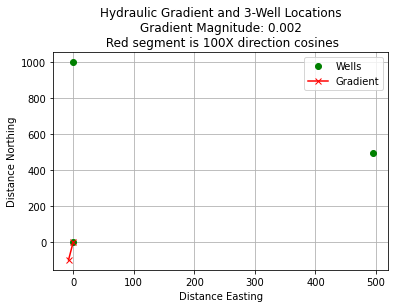

In [127]:
import numpy
import math
# well A is origin
wellID =['MW1','MW2','MW3']
well_X =[0.0,0.0,494.9]
well_Y =[0.0,1000.0,494.9]
well_Z =[83.1,84.6,83.9]
amatrix = [[0 for j in range(3)]for i in range(3)]
b = [0 for j in range(3)]
# A-matrix
for i in range(3):
    amatrix[i][0]=well_X[i]
    amatrix[i][1]=well_Y[i]
    amatrix[i][2]=1.0
    b[i]= well_Z[i] 
amatrix = numpy.array(amatrix) #typecast as numpy array
b = numpy.array(b)
x = numpy.linalg.solve(amatrix,b) # solve equation of plane
# recover and report results
print("x-component hydraulic gradient: ",round(-x[0],3))
print("y-component hydraulic gradient: ",round(-x[1],3))
grad = math.sqrt(x[0]**2+x[1]**2)
print("magnitude hydraulic gradient: ",round(grad,3))
print("direction cosine x-component hydraulic gradient: ",round(-x[0]/grad,3))
print("direction cosine y-component hydraulic gradient: ",round(-x[1]/grad,3))
# use this if want to plot
list1 = [0,-100*x[0]/grad] 
list2 = [0,-100*x[1]/grad] 
stry='Distance Northing'
strx='Distance Easting'
strtitle='Hydraulic Gradient and 3-Well Locations\n'+'Gradient Magnitude: '+ str(round(grad,3)) +'\n Red segment is 100X direction cosines' 

plotlabel=['Wells','Gradient']
from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
plt.plot(well_X, well_Y, color ='green', marker ='o', linestyle ='none') # create a line chart, years on x-axis, gdp on y-axis
plt.plot(list1, list2, color ='red', marker ='x', linestyle ='solid')
plt.title(strtitle)# add a title
plt.ylabel(stry)# add a label to the x and y-axes
plt.xlabel(strx)
plt.legend(plotlabel)
plt.grid()
plt.show() # display the plot

Application of Ogata Banks

Seepage Velocity = K grad = 5.0 cm/sec * 0.002 = 0.01 cm/sec = 864 cm/day = 0.864 m/day

Species velocity = seepage velocity/n = 0.864 m/day / 0.32 = 2.700 m/day

D = disperesivity * velocity = 400 * 2.7 = 1080 m^2/d

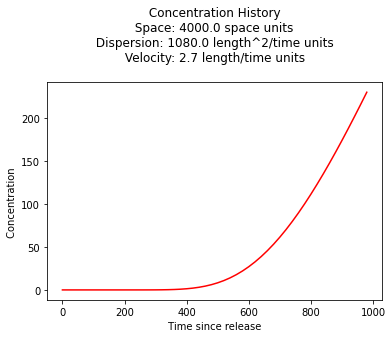

In [145]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 4000.      # where in X-direction are we
time  = 1000.      # how far in T-direction to extend the plot (change to 1400 for 500 ppm find)
dispersion = 1080.0  # dispersion coefficient
velocity = 2.7    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [146]:
c[-1]

230.2661463268119

At 1000 days, about 230ppm concentration

Time to 500 ppm is 1400 days

<hr>
<hr>

## CE 5363 Question 6 (15 pts.)

The three figures below depict streamline patterns for flow near a circular region.  

![](streamPattern.png)

Explain the differences in the patterns in terms of the hydraulic conductivity within the circular region and the surrounding region.

<hr>
<hr>

1. Circle same K as surround
2. Circle smaller K than surround, flow moves around object
3. Circle larger K than surround, flow "drawn into" region by low permeability

## CE 4363/5363 Question 7 (Extra Credit) (10 pts.)

Consider a single “cell” model. The cell contains a liquid with known initial concentration of a pollutant. The cell is flushed at a constant flow rate with a liquid with zero concentration of the pollutant.  

![](singleCell.png)

The cell is completely back-mixed, so any mass entering is uniformily distributed within the cell.  The volume of the cell is $V$, the discharge entering and leaving is $Q$

Determine:

1. An expression for the mass of **pollutant** in the cell at any time.
2. A difference expression for the change in mass in the cell over a discrete time interval (∆t).
3. The mass flow of pollutant into the cell (yes, I know its zero, but play along).
4. The mass flow of pollutant leaving the cell.
5. Combine 2,3, and 4 into a single balance expression (i.e. $\frac{\Delta C}{\Delta t} = \dots~$).

<hr>
<hr>

<!-- ## CE 5363 Question 15 (40 pts.)

Given the four-cell conceptualization of an aquifer with the properties listed below 

![](4cellmodel.png)

Determine:

1. Write the steady-flow balance equations for average water levels in the four cells
2. Solve these equations to determine if the aquifer is a net supplier of water to the river or if the river is a supplier of water to the aquifer.
3. Write the steady-state balance equations for average concentration of a conservative tracer in the four cells.
4. If the river concentration of this tracer is 1,000 mg/L, calculate the steady-state concentrations in the four cells.

### Reference(s)

1. [Bear (1979). *Hydraulics of Groundwater* McGraw-Hill (Chapter 10: Modeling of Aquifer Systems)](ce-4363-webroot/3-Readings/BearChapter10.pdf) (Eq. 10-9) is useful, also (Eq. 10-11).  

<hr>
<hr>

-->

<!-- ## Question 3 (3 pts.)

Distinguish between calibration and validation for a numerical groundwater computer model.

<hr>
<hr>
-->

<!-- ## Question 2 (5 pts.)

List four potential sources of groundwater contamination.

<hr>
<hr>
-->

<!-- ## Question 9 (15 pts.)

A one-dimensional soil column experiment was performed to study the effects of dispersion on solutes in a soil sample. The soil column was 0.30 m long, and the actual flow velocity was set at 6.0 cm/hr. The dispersivity of the solute was found to be 4.5 cm. Molecular diffusion was neglected. A conservative tracer, which was initially absent in the soil column, was introduced to the influent end of the column at time zero at a concentration of 50 mg/L. 

Determine:
1. The concentration of the tracer in the column effluent in mg/L at time of 4.5 hr after injection began.

<hr>
<hr>
-->

<!-- ## CE 5363 Question 12 (10 pts.)

In a plan view of a contaminant plume you notice that the leading edge of the chloride has moved approximately 1500 meters, while cadmium has moved only about 400 meters.  Both constituients were released at the same time; the aquifer porosity is 0.30 and the solids density is 2.22 g/cc.

![](plumerb.png)

Determine:
1. The distribution coefficient for cadmium

### References

1. Fetter Eq. 10-15 p. 418

<hr>
<hr>
-->

<!-- ## Question 4 (5 pts.)

Does the presence of a man-made chemical in groundwater make it unusable? Explain your answer in terms of regulatory or technical issues.

<hr>
<hr>
-->

<!-- 
## Question 4 (5 pts.)

Explain how geophysical application of electrical resistivity can be used to distinguish between clay and sand, and between dry and saturated clay.

<hr>
<hr>
-->

<!-- ## Question 6 (5 pts.)

Explain the concept of safe yield for an aquifer. Why is it hard to define? Why must we try to define it?

<hr>
<hr> -->